In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Create a similar dataset

In [2]:
day = (pd.read_csv('./data.csv')
       .assign(time_of_day = lambda d: (d['x'] - d['x'].min())/ (d['x'].max() - d['x'].min()) *24)
       .rename({'y':'target'},axis=1)
       .drop(['x','z'],axis=1)
      )

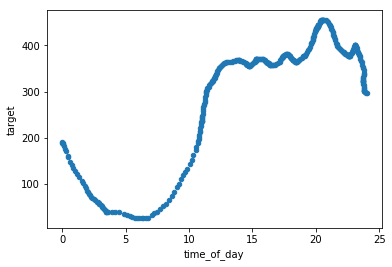

In [3]:
day.plot.scatter('time_of_day','target');

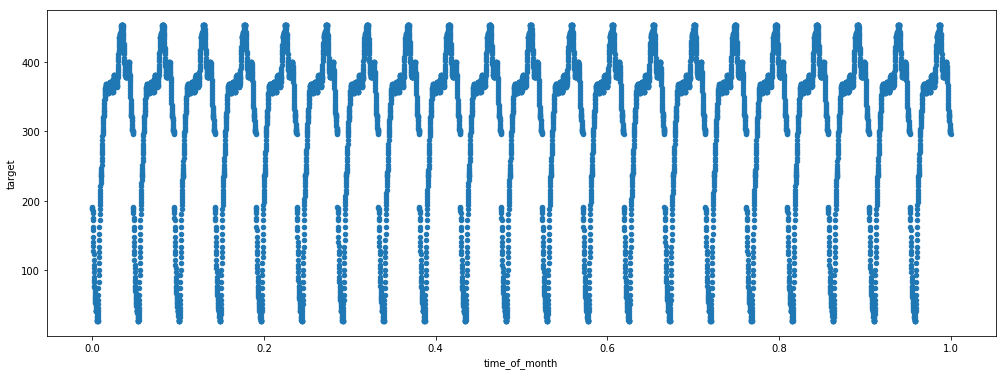

In [4]:
month = (pd.concat([day]*21)
           .assign(time_of_month = lambda d: np.linspace(0,1,len(d)))
        )

month.plot.scatter('time_of_month','target',figsize=(17,6));

# Make RBF Features

In [5]:
from sklego.preprocessing import RepeatingBasisFunction

N_PERIODS = 10
rbf = RepeatingBasisFunction(n_periods=N_PERIODS,
                             remainder='passthrough',
                             column='time_of_day',
                             )
rbf.fit(month[['time_of_day','time_of_month']])
Xt = rbf.transform(month[['time_of_day','time_of_month']])


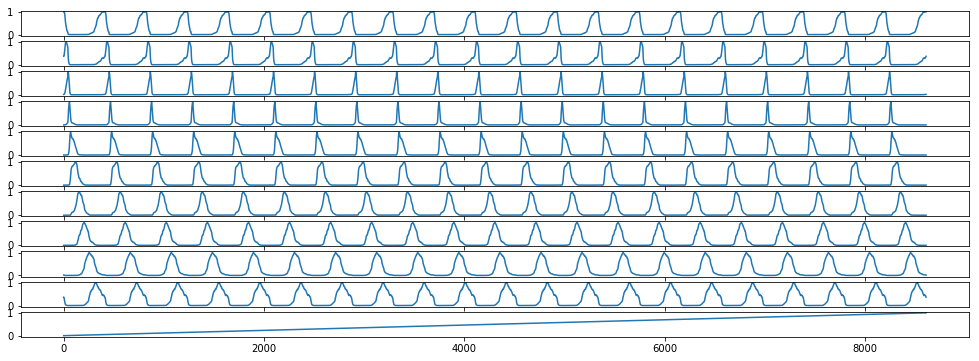

In [6]:
ncols = Xt.shape[1]
fig, axes = plt.subplots(nrows=ncols,figsize=(17,6))

for c in range(ncols):
    axes[c].plot(Xt[:,c])

# Fit model

In [7]:
from sklearn.linear_model import LinearRegression

est = LinearRegression().fit(Xt, month['target'])
pred = est.predict(Xt)

# Show results

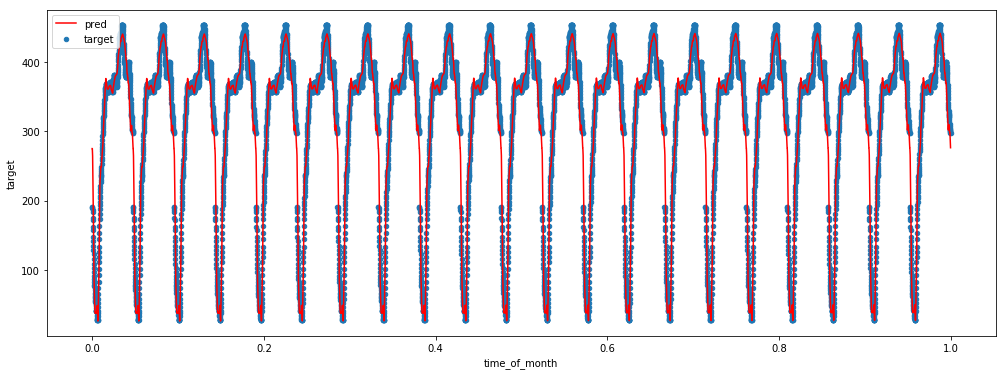

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(17,6))
month.plot.scatter('time_of_month','target',ax=ax,label='target')
ax.plot(month['time_of_month'],pred,label='pred',c='r')
ax.legend();